In [38]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import csv

In [79]:
x = []
y = []

In [80]:
InputFile = open("Input.csv","r")
InputReader = csv.reader(InputFile)
for item in InputReader:
    # print(item)
    item = [float(i) for i in item]
    # print(item)
    # print(item[1:-1])
    x.append(item[1:-1])
    # print(x)

OutputFile = open("Output.csv","r")
OutputReader = csv.reader(OutputFile)
for item in OutputReader:
    print(item)
    item = [float(i) for i in item]
    y.append(item[1:])
    print(y)
    

['0', '0', '0', '0', '0', '0', '0', '0']
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
['1', '0', '1', '0', '0', '0', '0', '1']
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]]


In [81]:
# x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)

# x = torch.FloatTensor([[1.3],[2.1]])
# y = x.pow(2) + 0.2*torch.rand(x.size())

x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
# y = x.pow(2) + 0.2*torch.rand(x.size())

x,y = Variable(x), Variable(y)
# x = Variable(x)

print(x)
print(y)

tensor([[1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1.]])


In [83]:
# plt.scatter(x.data.numpy(),y.data.numpy())
# plt.show()

In [84]:
class Net(torch.nn.Module):
   def __init__(self, n_feature, n_hidden, n_output):
       super(Net, self).__init__()
       self.hidden = torch.nn.Linear(n_feature,n_hidden)
       self.predict = torch.nn.Linear(n_hidden,n_output)
   
   def forward(self, x):
       x = F.relu(self.hidden(x))
       x = self.predict(x)
       return x

In [85]:
net = Net(25, 20, 6)
print(net)


Net(
  (hidden): Linear(in_features=25, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=7, bias=True)
)


In [86]:
# plt.ion()
# plt.show()

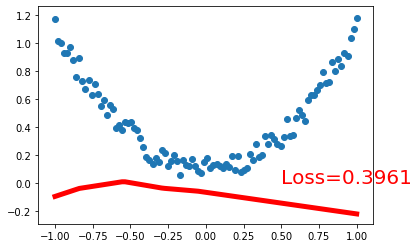

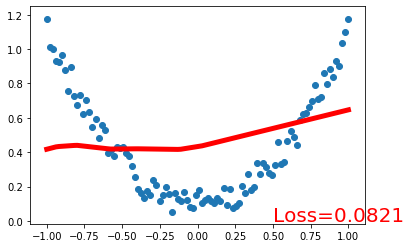

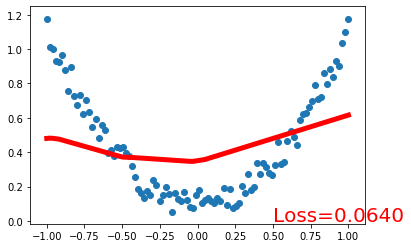

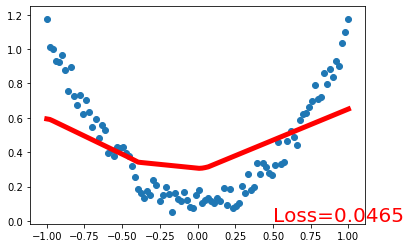

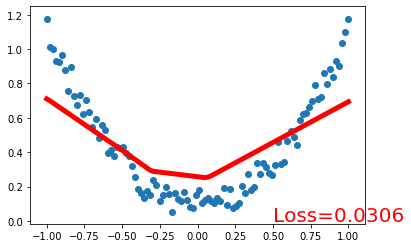

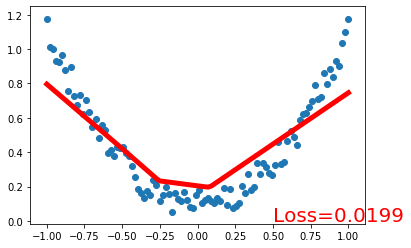

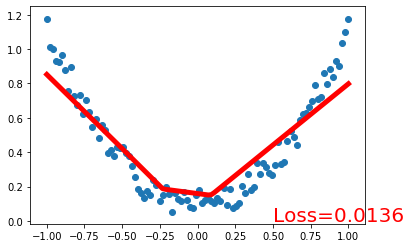

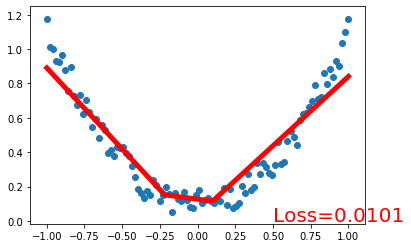

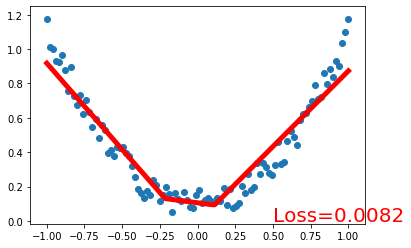

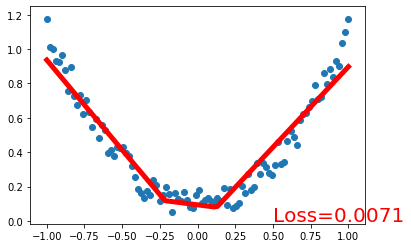

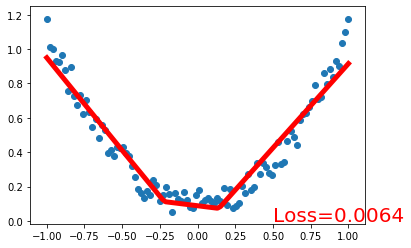

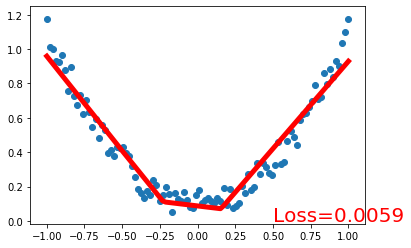

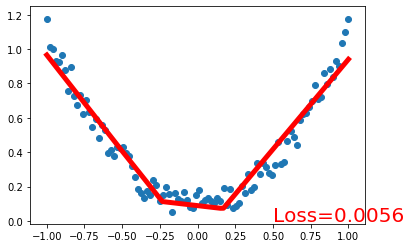

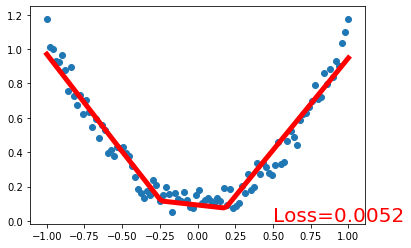

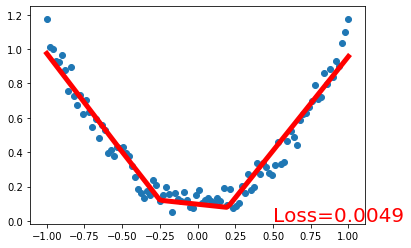

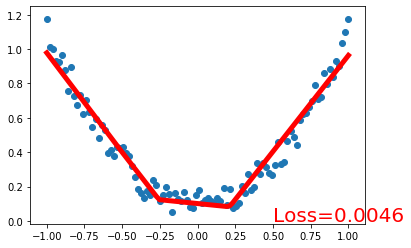

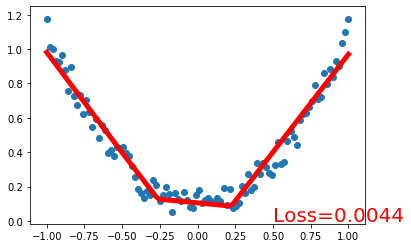

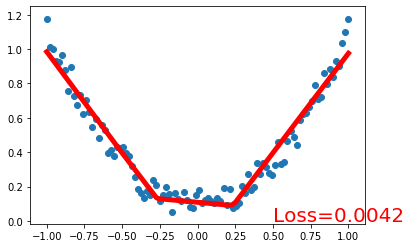

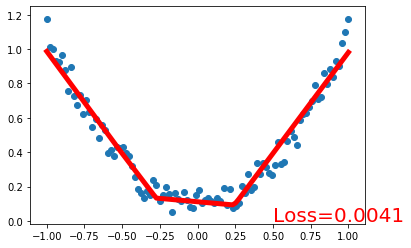

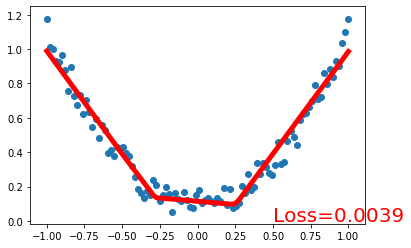

In [22]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
loss_func = torch.nn.MSELoss()

for t in range(100):
    prediction = net(x)

    loss = loss_func(prediction, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#     if t % 5 == 0:
#         plt.cla()
#         plt.scatter(x.data.numpy(),y.data.numpy())
#         plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
#         plt.text(0.5,0,'Loss=%.4f'%loss.data,fontdict={'size':20,'color':'red'})
#         plt.pause(0.1)

# plt.ioff()
# plt.show()
